# End-to-End Web Traffic Analysis Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("01_website data.csv")

In [4]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [6]:
 df.columns = df.iloc[0]
 df = df.drop(index = 0).reset_index(drop = True)
 df.columns = ["channel group", "datehour", "users", "sessions", "Engaged sessions", "Average engagement time per session", "Engaged sessions per user",
               "Events per session", "Engagement rate", "Event count"]

In [7]:
df.head(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [8]:
df.tail(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2
3181,Unassigned,2024050307,0,1,0,0,0,2,0,2


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

channel group                          0
datehour                               0
users                                  0
sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   datehour                             3182 non-null   object
 2   users                                3182 non-null   object
 3   sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [12]:
 df["datehour"] = pd.to_datetime(df["datehour"], format="%Y%m%d%H", errors='coerce')

In [13]:
 numeric_cols = df.columns.drop(["channel group", "datehour"])
 df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
 df["Hour"] = df["datehour"].dt.hour

In [14]:
df.head(5)

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [15]:
df["channel group"].value_counts()

channel group
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

In [16]:
df.describe()

,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Exploratory Data Analysis

On Time Domain

In [17]:
df['datehour'] = pd.to_datetime(df['datehour'], format='%Y%m%d%H')
df['date'] = df['datehour'].dt.date
df['hour'] = df['datehour'].dt.hour

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

#Find peak user hours

In [19]:
df['hour'].value_counts()

hour
19    144
20    143
14    142
16    142
15    142
22    141
10    138
21    138
12    138
18    136
11    135
17    135
13    133
0     131
9     131
23    130
6     126
1     125
2     124
8     123
7     123
3     121
5     121
4     120
Name: count, dtype: int64

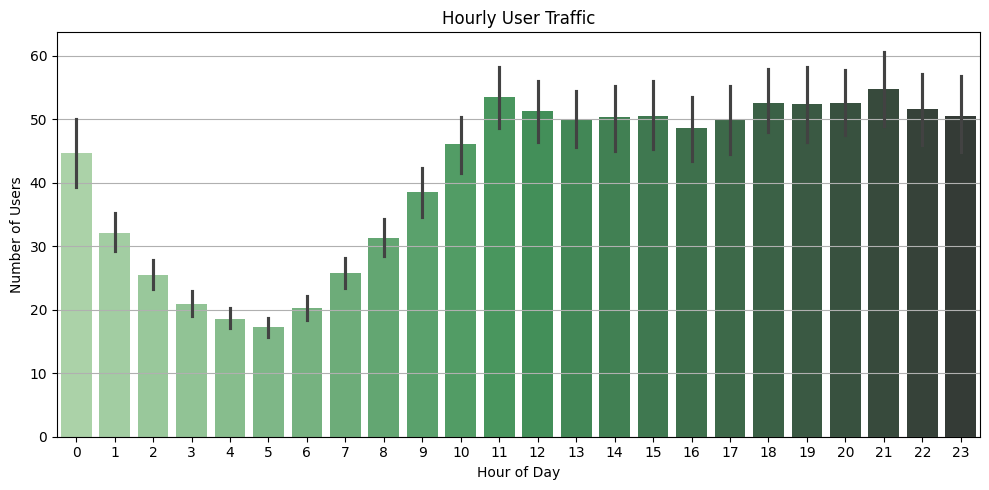

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='users', data=df, palette='Greens_d')
plt.title('Hourly User Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Users')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Dates bringing MOST traffic

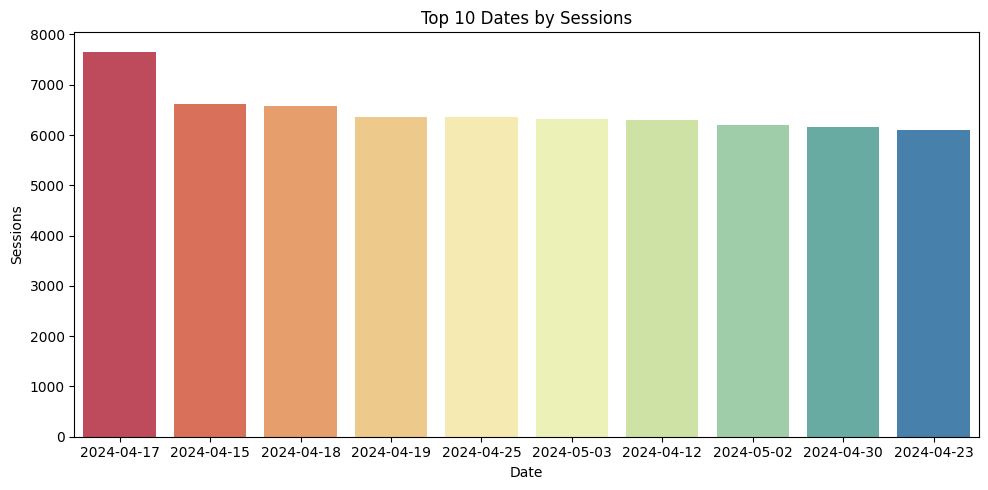

In [21]:
daily_sessions = df.groupby('date')['sessions'].sum().reset_index()
top_5_sessions = daily_sessions.sort_values(by='sessions', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='sessions', data=top_5_sessions, palette='Spectral')
plt.title('Top 10 Dates by Sessions')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.tight_layout()
plt.show()

Channel-wise hourly Traffic

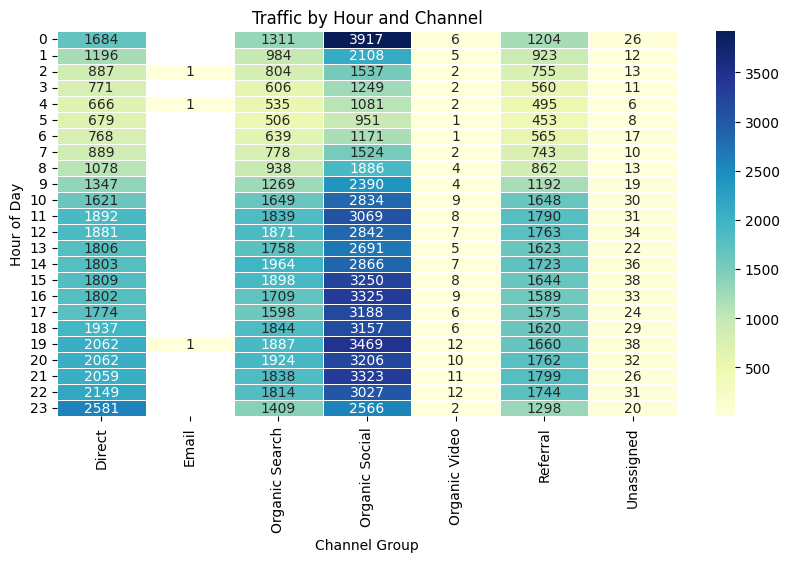

In [22]:
heatmap_data = df.groupby(["Hour", "channel group"])["sessions"].sum().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

EDA suggests that the Traffic is more during the month of April, particularly after 10 PM, and the Organic Social channel consistently drives high user engagement.

on Traffic Channel Group

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

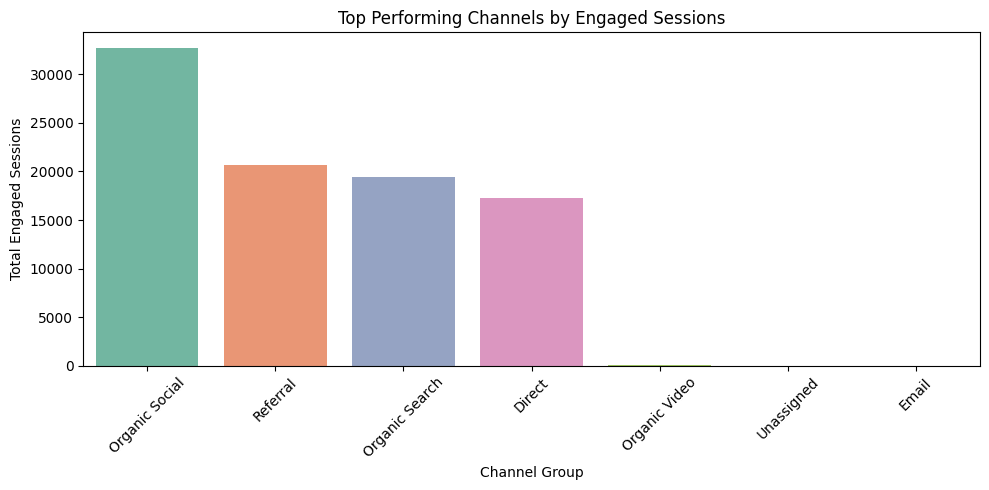

In [24]:
top_channels = df.groupby("channel group")[["Engaged sessions", "Engagement rate"]].sum().sort_values(by="Engaged sessions", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.index, y=top_channels["Engaged sessions"], palette="Set2")
plt.title("Top Performing Channels by Engaged Sessions")
plt.xlabel("Channel Group")
plt.ylabel("Total Engaged Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Engaged Sessions of Organic Social channel far better than Referral and Organic Search channel.

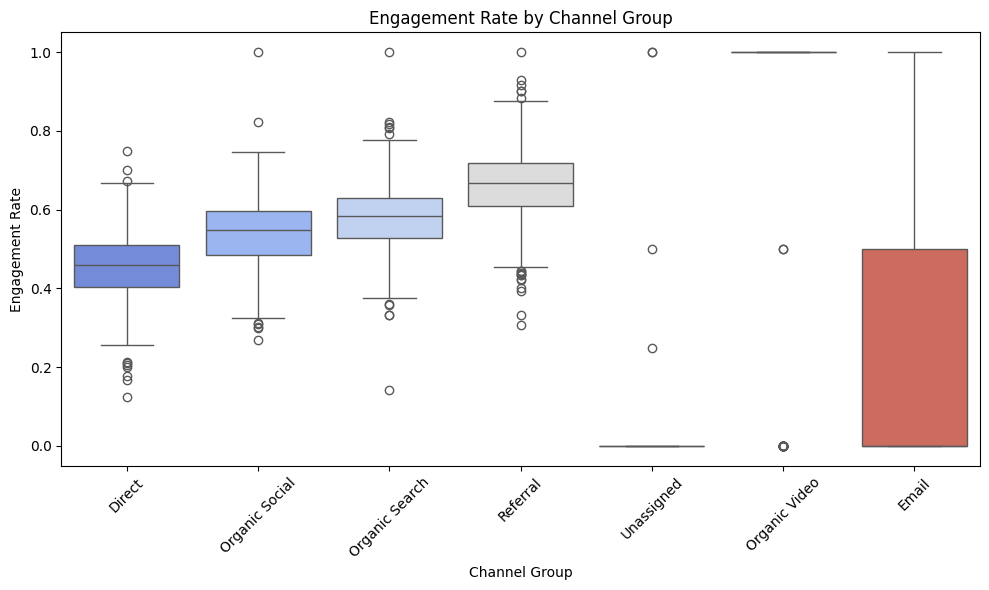

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="channel group", y="Engagement rate", data=df, palette="coolwarm")
plt.title("Engagement Rate by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Email channel appears to be the most effective channel for Traffic Engagement Rate and the Organic Video Channel has the least.

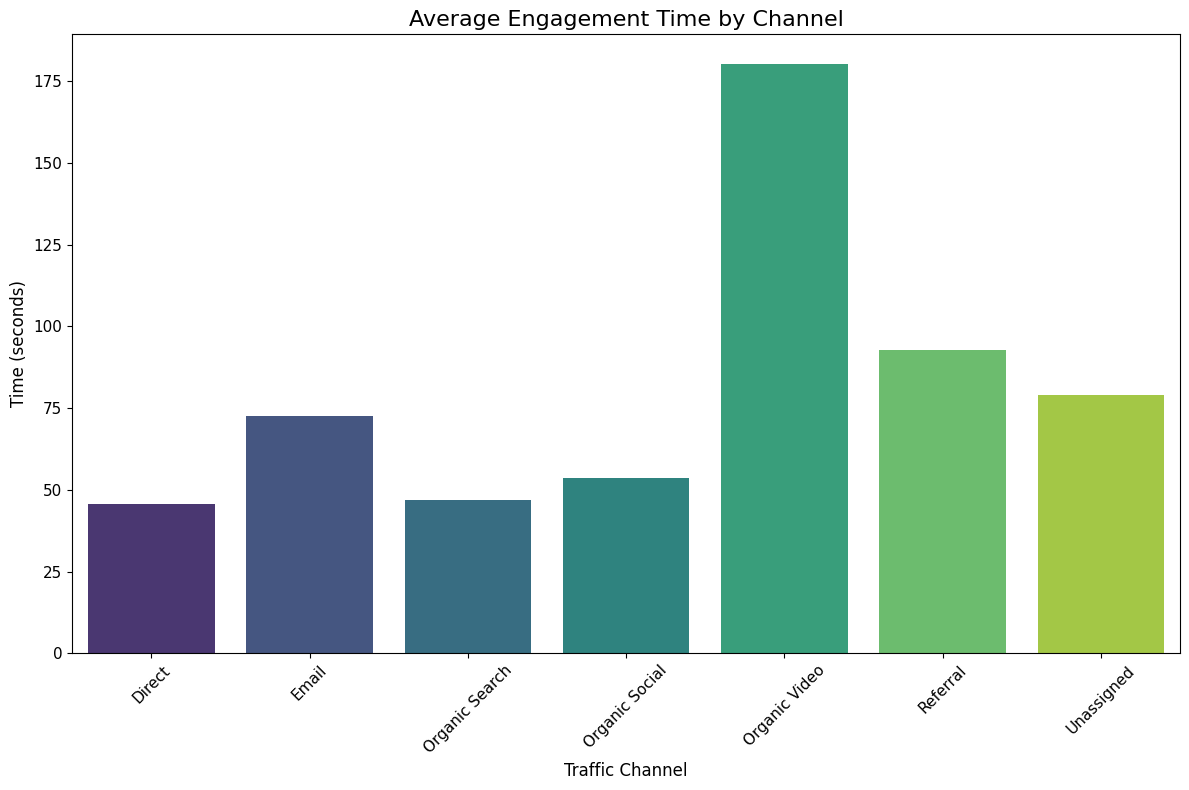

In [26]:
plt.figure(figsize=(12, 8))  # Increase figure size

# Calculate mean engagement time per channel
avg_engagement = df.groupby('channel group')['Average engagement time per session'].mean().reset_index()

# Bar plot
sns.barplot(data=avg_engagement, x='channel group', y='Average engagement time per session', palette='viridis')

plt.title("Average Engagement Time by Channel", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xlabel("Traffic Channel", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

On Users over time

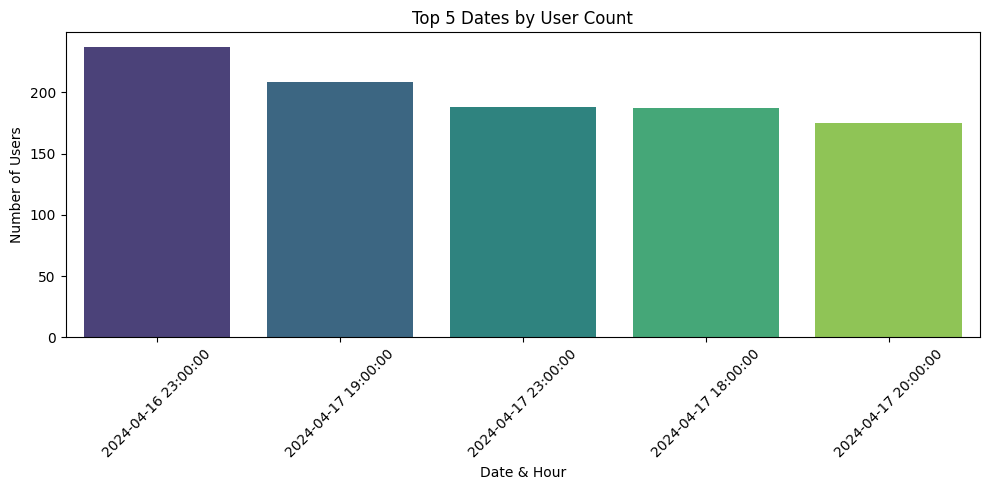

In [27]:
top_5_users = df.sort_values(by="users", ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="datehour", y="users", data=top_5_users, palette="viridis")
plt.title("Top 5 Dates by User Count")
plt.xlabel("Date & Hour")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The User count is more at the Evening time than the day time users.

In [28]:
df["datehour"].nunique()

672

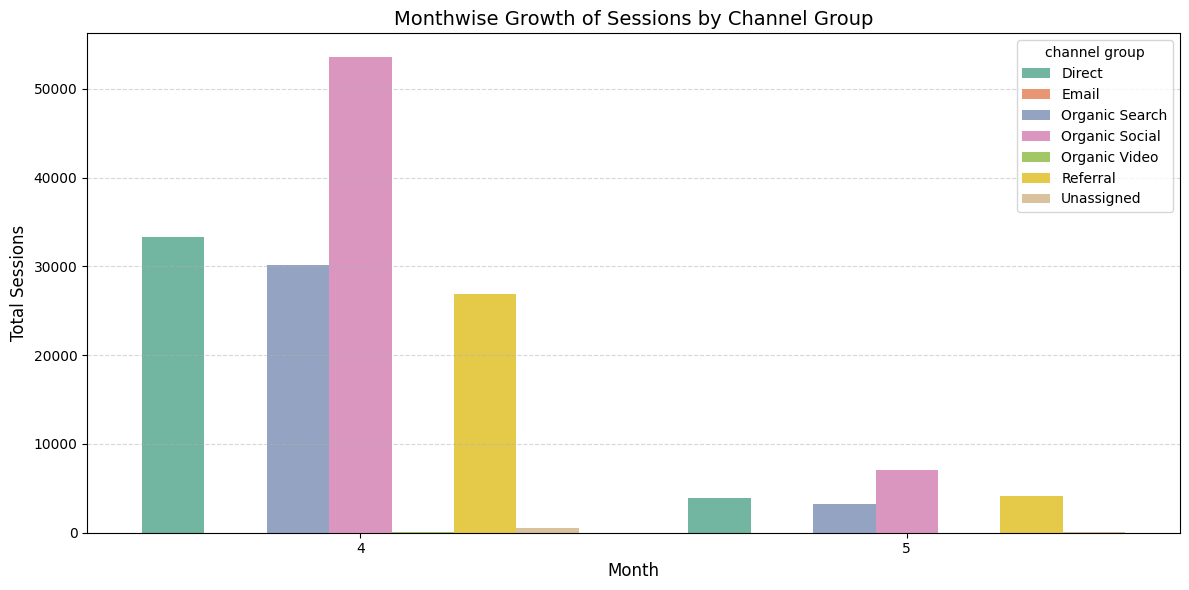

In [29]:
df['month'] = df['datehour'].dt.month

monthly_growth = df.groupby(['month', 'channel group'])['sessions'].sum().reset_index()

# Plotting as barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_growth, x='month', y='sessions', hue='channel group', palette='Set2')

plt.title("Monthwise Growth of Sessions by Channel Group", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sessions", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In the month of April there is a huge response from the channels like organic social, direct, organic search and referral.

Average Engagement Rate

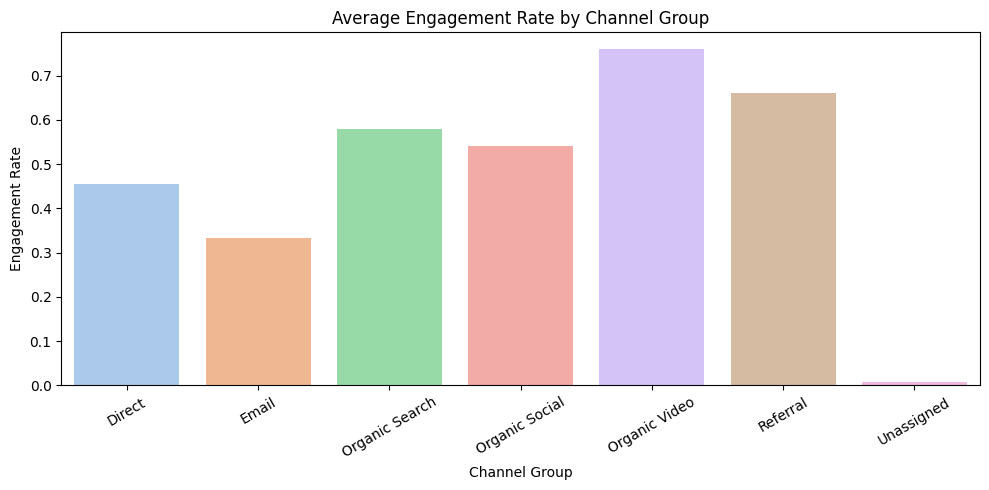

In [30]:
avg_engagement = df.groupby("channel group")["Engagement rate"].mean().reset_index()

# Plot as bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="channel group", y="Engagement rate", data=avg_engagement, palette="pastel")
plt.title("Average Engagement Rate by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The Average Engagement Rate via Organic Video channel is higher followed by referral, then organic search.

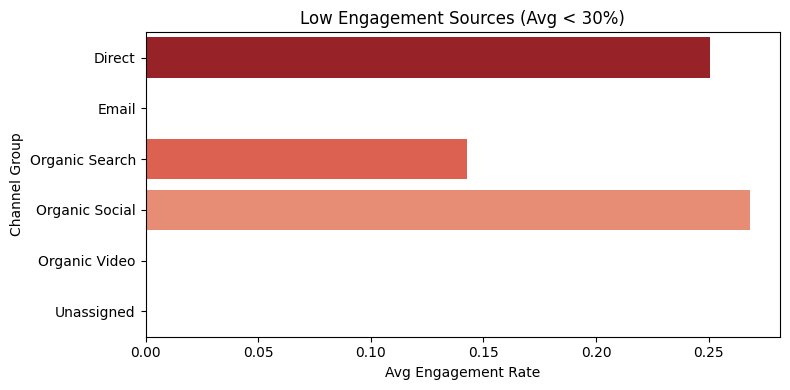

In [31]:
low_engagement = df[df["Engagement rate"] < 0.3].groupby("channel group")["Engagement rate"].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x="Engagement rate", y="channel group", data=low_engagement, palette="Reds_r")
plt.title("Low Engagement Sources (Avg < 30%)")
plt.xlabel("Avg Engagement Rate")
plt.ylabel("Channel Group")
plt.tight_layout()
plt.show()

Direct Channel is such a channel where the traffic engagement is less than 30%.

On Engaged Session per User

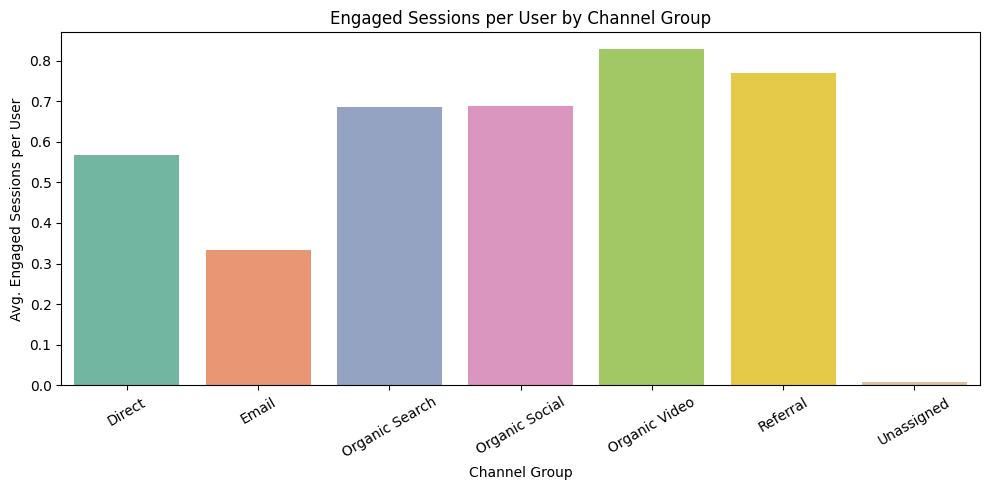

In [32]:
engaged_per_user = df.groupby("channel group")["Engaged sessions per user"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="channel group", y="Engaged sessions per user", data=engaged_per_user, palette="Set2")
plt.title("Engaged Sessions per User by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Avg. Engaged Sessions per User")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Organic Video has the highest Average Engaged Sessions of nearly 0.8 secs followed by Referral nearly 0.7 sec.

On Events per Session & Average Event Count

In [33]:
event_count_by_channel = df.groupby("channel group")["Event count"].sum().reset_index()
event_count_by_channel

,channel group,Event count
0,Direct,156318
1,Email,10
2,Organic Search,136957
3,Organic Social,296631
4,Organic Video,1071
5,Referral,177992
6,Unassigned,1932


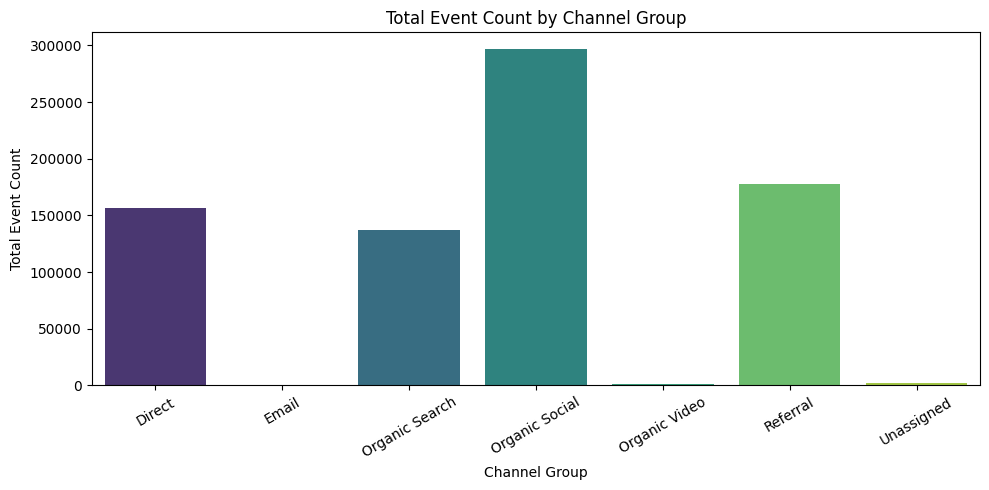

In [34]:
event_count_by_channel = df.groupby("channel group")["Event count"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="channel group", y="Event count", data=event_count_by_channel, palette="viridis")
plt.title("Total Event Count by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Total Event Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The total Event Count of Orgnic Social is 296631, followed by Referral 177992 and Direct 156318.

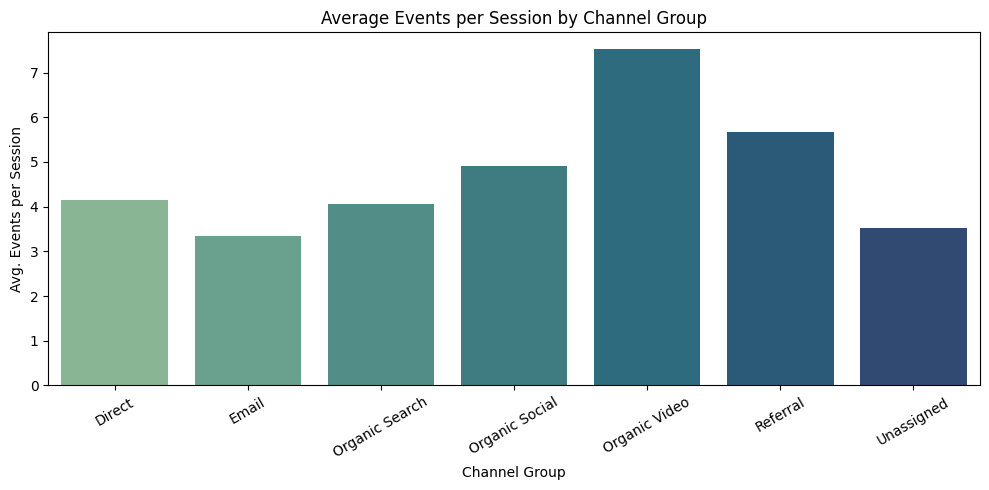

In [35]:
events_per_session = df.groupby("channel group")["Events per session"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="channel group", y="Events per session", data=events_per_session, palette="crest")
plt.title("Average Events per Session by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Avg. Events per Session")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The Average Events per Session is higher for Organic Video, then referral and Organic Social.

Engaged vs Non Engaged Sessions

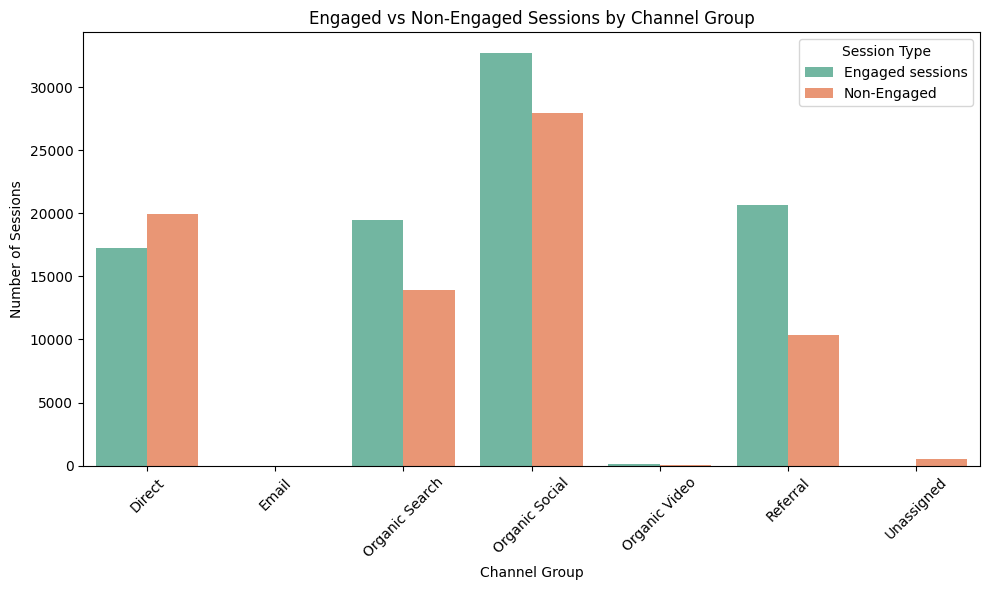

In [36]:
session_df = df.groupby("channel group")[["sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["sessions"] - session_df["Engaged sessions"]

# Reshaping for plotting
session_df_melted = session_df.melt(id_vars="channel group", 
                                    value_vars=["Engaged sessions", "Non-Engaged"],
                                    var_name="Session Type", value_name="Count")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=session_df_melted, x="channel group", y="Count", hue="Session Type", palette="Set2")
plt.title("Engaged vs Non-Engaged Sessions by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Organic Social channel has the highest Engaged as well as Non-engaged sessions but the direct channel has the non engaged sessions 
more than the engaged session.